# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [1]:
# read the titanic train.csv file into a dataframe
import pandas as pd
df= pd.read_csv('train.csv')


In [2]:
# show the percentage of the passengers that boarded at different ports
df.Embarked.value_counts(normalize = True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

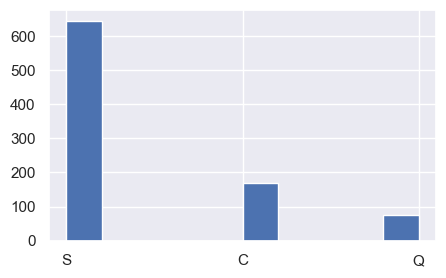

In [3]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
# Plot the histogram
plt.figure(figsize=(5,3))
# sns.histplot(data=df_train, x='Embarked', discrete=True, stat='count', kde=False)
df.Embarked.hist()

# Show the plot
plt.show()



![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [5]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.

survival_counts = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
survival_rates = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100

print(survival_rates)



Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


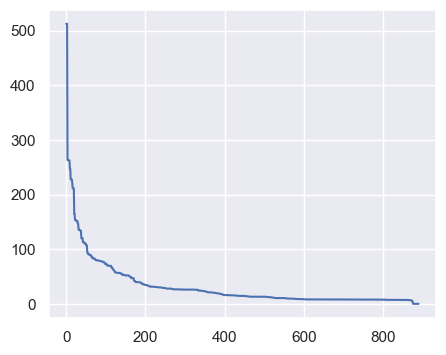

In [13]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below


sorted_fares = df['Fare'].sort_values(ascending=False).reset_index(drop=True)
plt.figure(figsize=(5,4))
plt.plot(sorted_fares)

plt.show()



![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



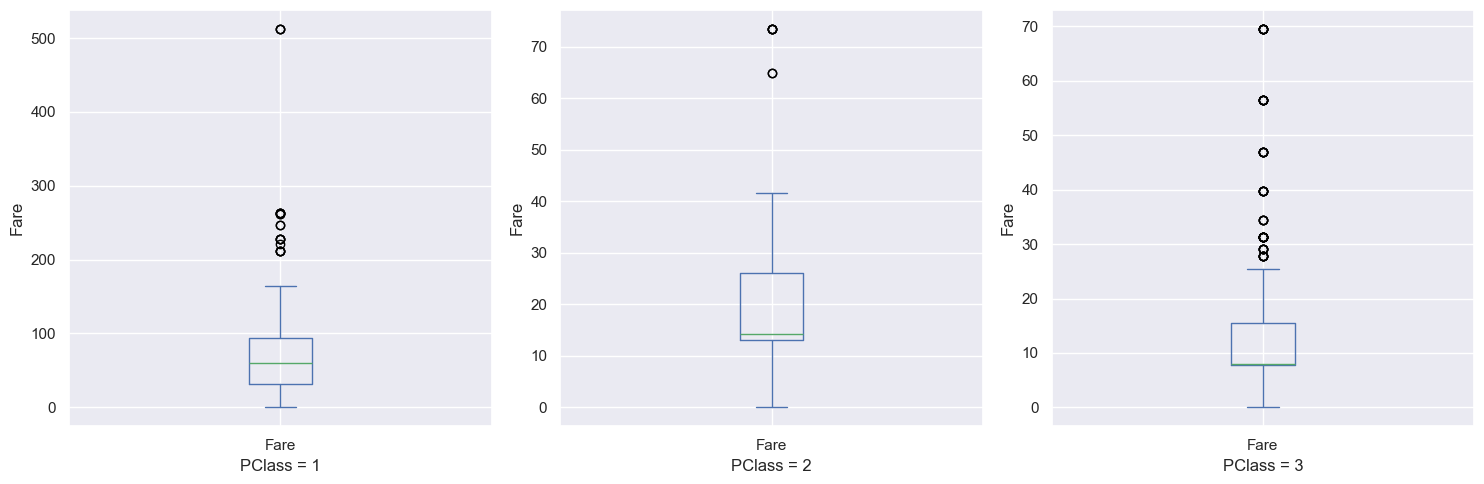

In [18]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below

# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# Box plot for ticket prices (Fare) by class (Pclass)
plt.subplot(1, 3, 1)
df[df['Pclass'] == 1]['Fare'].plot(kind='box')
plt.xlabel('PClass = 1')
plt.ylabel('Fare')

plt.subplot(1, 3, 2)
df[df['Pclass'] == 2]['Fare'].plot(kind='box')
plt.xlabel('PClass = 2')
plt.ylabel('Fare')

plt.subplot(1, 3, 3)
df[df['Pclass'] == 3]['Fare'].plot(kind='box')
plt.xlabel('PClass = 3')
plt.ylabel('Fare')

# Adjust layout
plt.tight_layout()
plt.show()


![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [19]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function


# Group the data by 'Pclass' and calculate the survival rate for each class
survival_rates = df.groupby('Pclass')['Survived'].mean()

# Find the class with the highest survival rate
highest_survival_class = survival_rates.idxmax()
highest_survival_rate = survival_rates.max()

print(f"For people with ticket class {highest_survival_class}, the survival rate is the highest, which is {highest_survival_rate:.2f}.")


For people with ticket class 1, the survival rate is the highest, which is 0.63.


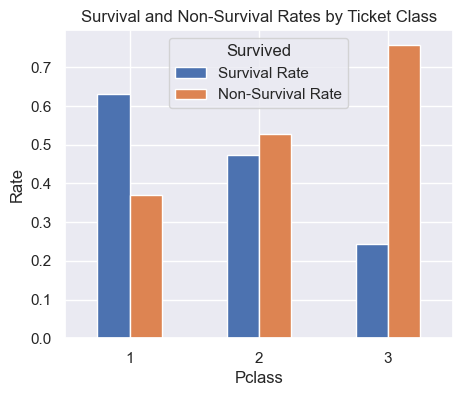

In [26]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below


# Group by 'Pclass' and 'Survived', calculate survival and non-survival rates
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
survival_counts['Survival Rate'] = survival_counts[1] / (survival_counts[0] + survival_counts[1])
survival_counts['Non-Survival Rate'] = survival_counts[0] / (survival_counts[0] + survival_counts[1])

# Combine both rates into a single DataFrame for plotting
rates = survival_counts[['Survival Rate', 'Non-Survival Rate']]

# Plot the bar chart
rates.plot(kind='bar', figsize=(5, 4))

# Set titles and labels
plt.title('Survival and Non-Survival Rates by Ticket Class')
plt.xlabel('Pclass')
plt.ylabel('Rate')
plt.xticks(rotation=0)  # Keep x-ticks horizontal

# Show the plot
plt.show()




![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
